# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [2]:
# Download front-month futures data
#symbols = ['ES=F', 'ZN=F', 'GC=F', 'DX=F']
symbols = ['BZ=F', 'CL=F', 'NQ=F', 'ZF=F']
data = yf.download(symbols)

[*********************100%%**********************]  4 of 4 completed


In [3]:
data.head()
data.columns

MultiIndex([('Adj Close', 'BBAI'),
            ('Adj Close',  'CLF'),
            ('Adj Close', 'NVDA'),
            ('Adj Close', 'PLTR'),
            (    'Close', 'BBAI'),
            (    'Close',  'CLF'),
            (    'Close', 'NVDA'),
            (    'Close', 'PLTR'),
            (     'High', 'BBAI'),
            (     'High',  'CLF'),
            (     'High', 'NVDA'),
            (     'High', 'PLTR'),
            (      'Low', 'BBAI'),
            (      'Low',  'CLF'),
            (      'Low', 'NVDA'),
            (      'Low', 'PLTR'),
            (     'Open', 'BBAI'),
            (     'Open',  'CLF'),
            (     'Open', 'NVDA'),
            (     'Open', 'PLTR'),
            (   'Volume', 'BBAI'),
            (   'Volume',  'CLF'),
            (   'Volume', 'NVDA'),
            (   'Volume', 'PLTR')],
           names=['Price', 'Ticker'])

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [4]:
# Resample data to monthly frequency
data = data.resample('M').mean() # YOUR CODE HERE
# Convert index to datetime
data.index = pd.to_datetime(data.index)# YOUR CODE HERE

### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [5]:
# Subset adjusted close prices and fill NaNs
prices = data['Adj Close'] # YOUR CODE HERE
prices = prices.ffill()
prices = prices.dropna()
print(prices.isna().sum().sum())

# Convert index to datetime
prices.index = pd.to_datetime(prices.index)# YOUR CODE HERE

0


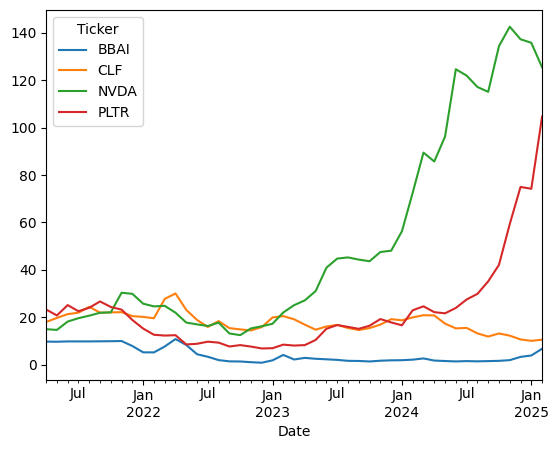

In [6]:
prices.plot()
plt.show()

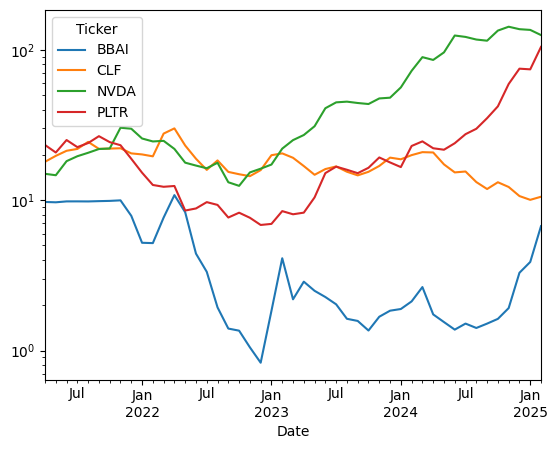

In [7]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [8]:
# Compute arithmetic returns
returns = prices.pct_change() # YOUR CODE HERE

In [9]:
print(returns)

Ticker          BBAI       CLF      NVDA      PLTR
Date                                              
2021-04-30       NaN       NaN       NaN       NaN
2021-05-31 -0.005189  0.095155 -0.021458 -0.108719
2021-06-30  0.013966  0.080831  0.240573  0.210493
2021-07-31  0.000304  0.028850  0.078426 -0.103064
2021-08-31 -0.000975  0.113920  0.054260  0.064586
2021-09-30  0.004592 -0.101411  0.059292  0.111150
2021-10-31  0.003812  0.004318  0.007925 -0.087059
2021-11-30  0.008283  0.004926  0.374398 -0.046291
2021-12-31 -0.210856 -0.075414 -0.014944 -0.187662
2022-01-31 -0.338311 -0.015818 -0.139004 -0.192083
2022-02-28 -0.005062 -0.028836 -0.044288 -0.171348
2022-03-31  0.478433  0.416761  0.009207 -0.027260
2022-04-30  0.410762  0.082915 -0.116322  0.012292
2022-05-31 -0.230747 -0.230846 -0.189891 -0.313440
2022-06-30 -0.469477 -0.183138 -0.043395  0.032362
2022-07-31 -0.243216 -0.157027 -0.040233  0.101813
2022-08-31 -0.420073  0.156022  0.087681 -0.041754
2022-09-30 -0.276892 -0.161240 

### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [10]:
returns.rolling(36).std()

Ticker,BBAI,CLF,NVDA,PLTR
Date,,,,
2021-04-30,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN
2021-07-31,NaN,NaN,NaN,NaN
2021-08-31,NaN,NaN,NaN,NaN
2021-09-30,NaN,NaN,NaN,NaN
2021-10-31,NaN,NaN,NaN,NaN
2021-11-30,NaN,NaN,NaN,NaN
2021-12-31,NaN,NaN,NaN,NaN


In [11]:
def compute_risk_parity_weights(returns, window_size=36):
    # Compute volatility known at time t
    rolling_vol = returns.rolling(window_size).std() # YOUR CODE HERE
    rolling_inverse_vol = 1/rolling_vol # YOUR CODE HERE
    # Divide inverse volatility by the sum of inverse volatilities
    risk_parity_weights = rolling_inverse_vol.apply(lambda x:x/x.sum() , axis = 1 ) # YOUR CODE HERE
    # Shift weights by one period to use only information available at time t
    risk_parity_weights = risk_parity_weights.shift(1) # YOUR CODE HERE
    
    return risk_parity_weights

risk_parity_weights = compute_risk_parity_weights(returns, 36)

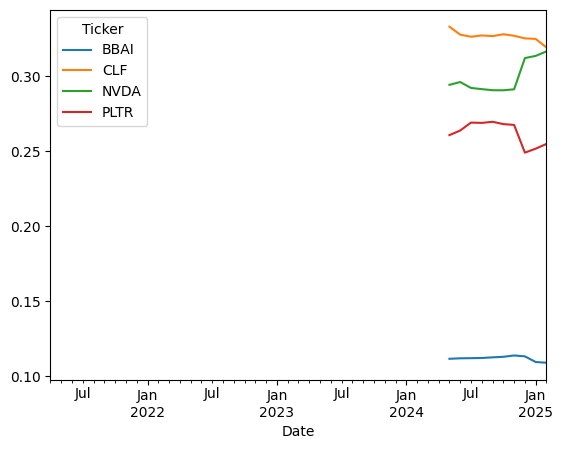

In [12]:
risk_parity_weights.plot()
plt.show()

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [13]:
# Calculate weighted returns
weighted_returns = returns * risk_parity_weights # YOUR CODE HERE
risk_parity_portfolio_returns = weighted_returns.sum(axis=1) # YOUR CODE HERE

In [14]:
print(risk_parity_portfolio_returns)

Date
2021-04-30    0.000000
2021-05-31    0.000000
2021-06-30    0.000000
2021-07-31    0.000000
2021-08-31    0.000000
2021-09-30    0.000000
2021-10-31    0.000000
2021-11-30    0.000000
2021-12-31    0.000000
2022-01-31    0.000000
2022-02-28    0.000000
2022-03-31    0.000000
2022-04-30    0.000000
2022-05-31    0.000000
2022-06-30    0.000000
2022-07-31    0.000000
2022-08-31    0.000000
2022-09-30    0.000000
2022-10-31    0.000000
2022-11-30    0.000000
2022-12-31    0.000000
2023-01-31    0.000000
2023-02-28    0.000000
2023-03-31    0.000000
2023-04-30    0.000000
2023-05-31    0.000000
2023-06-30    0.000000
2023-07-31    0.000000
2023-08-31    0.000000
2023-09-30    0.000000
2023-10-31    0.000000
2023-11-30    0.000000
2023-12-31    0.000000
2024-01-31    0.000000
2024-02-29    0.000000
2024-03-31    0.000000
2024-04-30    0.000000
2024-05-31   -0.037639
2024-06-30    0.064883
2024-07-31    0.049251
2024-08-31   -0.044564
2024-09-30    0.017312
2024-10-31    0.146290
2024-1

### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


In [15]:
# Evaluate portfolio performance
annual_mean_return = risk_parity_portfolio_returns.mean() * 12 # YOUR CODE HERE
annual_volatility = risk_parity_portfolio_returns.std() * (12 **0.5) # YOUR CODE HERE
skewness = risk_parity_portfolio_returns.skew() # YOUR CODE HERE
kurtosis = risk_parity_portfolio_returns.kurtosis()+ 3# YOUR CODE HERE

# Compute drawdown
cumulative_returns = (weighted_returns + 1).cumprod()# YOUR CODE HERE
running_max = cumulative_returns.cummax() # YOUR CODE HERE
drawdown = (running_max - cumulative_returns)/running_max  # YOUR CODE HERE
max_drawdown = np.max(drawdown) # YOUR CODE HERE

# Compute Sharpe ratio
sharpe_ratio = annual_mean_return/annual_volatility # YOUR CODE HERE

# Compute Sortino ratio
downside_std = risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0].std() * (12**0.5) # YOUR CODE HERE
sortino_ratio = annual_mean_return / downside_std  # YOUR CODE HERE

# Compute Calmar ratio
calmar_ratio = annual_mean_return/max_drawdown # YOUR CODE HERE

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.1493
Annual Volatility: 0.1441
Skewness: 2.6810
Kurtosis: 10.2186
Maximum Drawdown: 0.1540
Sharpe Ratio: 1.0359
Sortino Ratio: 2.0156
Calmar Ratio: 0.9696


In [16]:
max_drawdown

0.15400416337328207

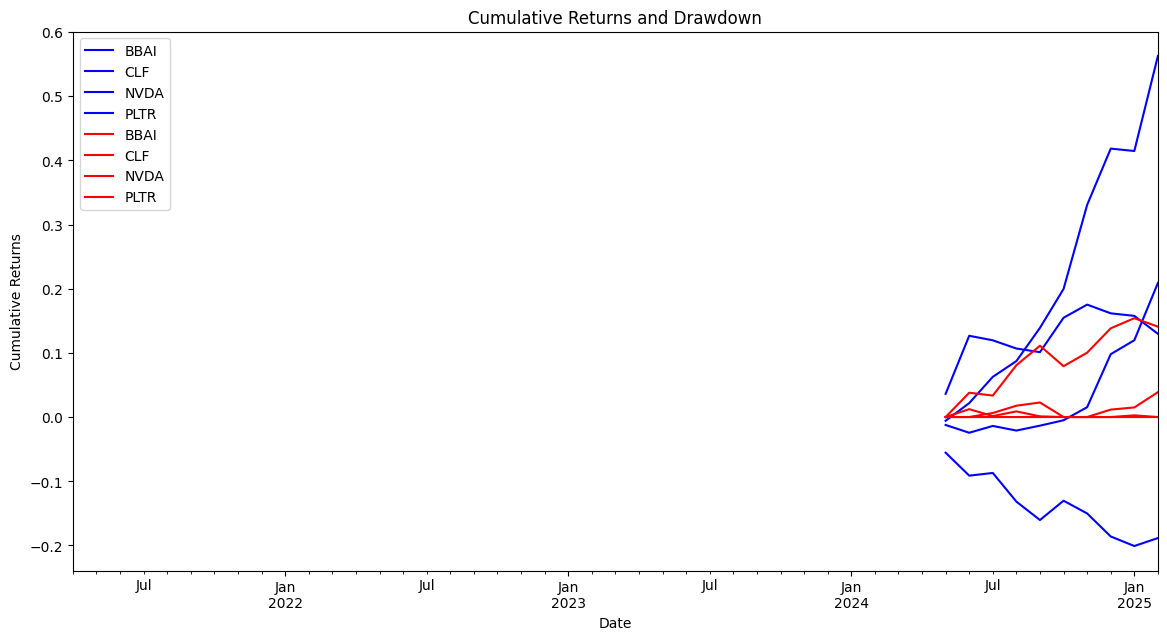

In [17]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))
(cumulative_returns - 1).plot(ax=ax, label='Cumulative Returns', color='blue')
drawdown.plot(ax=ax, label='Drawdown', color='red')
ax.set_title('Cumulative Returns and Drawdown')
ax.set_ylabel('Cumulative Returns')
ax.set_xlabel('Date')
ax.legend()
plt.show()